<a href="https://colab.research.google.com/github/ritesh537/ml-project/blob/master/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Survival Problem

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset and Visualization

In [ ]:
dataset = pd.read_csv('train.csv')
print(dataset.shape)
dataset.head

(891, 12)


<bound method NDFrame.head of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

**Missing Data Info**

In [ ]:
print(dataset.count())
mis_dat= dataset.isnull().sum()
print('Missing Data info')
print(mis_dat)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
Missing Data info
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Dataset Column types Info**

In [ ]:
dtype_df=dataset.dtypes.reset_index()
dtype_df.columns = [ "Column", "Column Type"]
print(dtype_df)

         Column Column Type
0   PassengerId       int64
1      Survived       int64
2        Pclass       int64
3          Name      object
4           Sex      object
5           Age     float64
6         SibSp       int64
7         Parch       int64
8        Ticket      object
9          Fare     float64
10        Cabin      object
11     Embarked      object


Visualization using matplotlib and seaborn

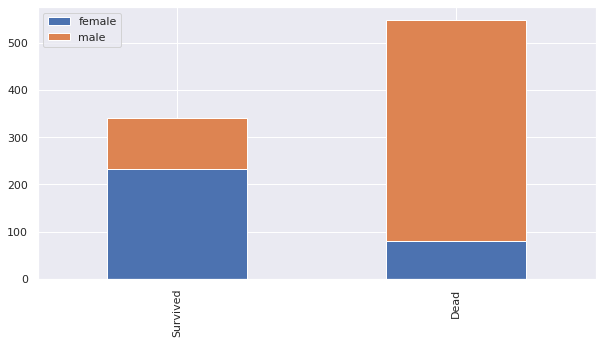

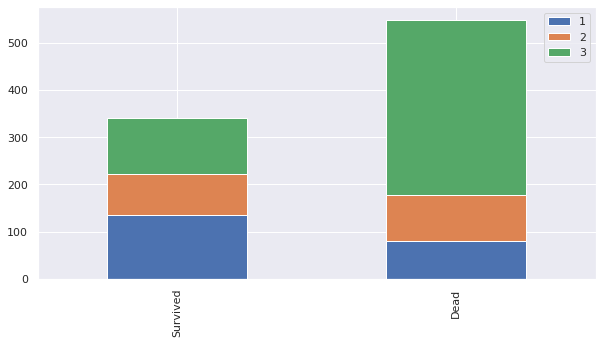

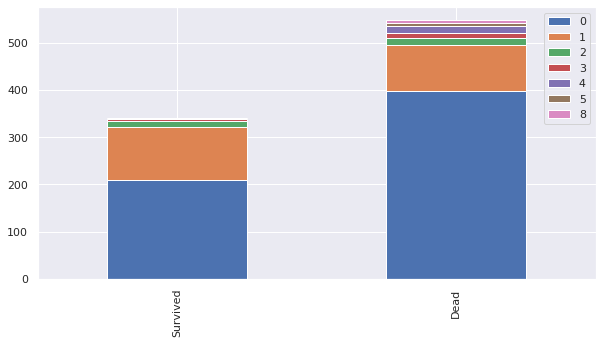

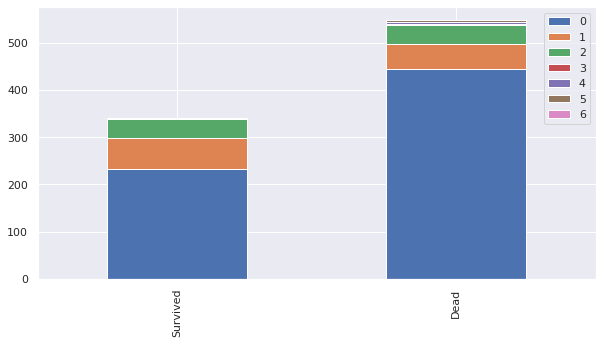

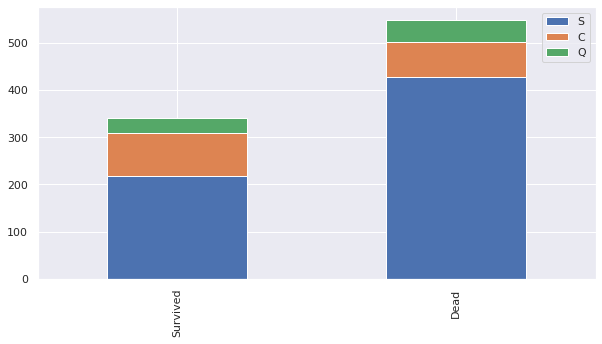

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def bar_chart(feature):
  survived=dataset[dataset['Survived']==1][feature].value_counts()
  dead= dataset[dataset['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survived, dead])
  df.index=['Survived','Dead']
  df.plot(kind='bar', stacked=True, figsize=(10,5))
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('SibSp')
bar_chart('Parch')
bar_chart('Embarked')

## Feature Engineering

1. Name

In [ ]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Mme           1
Countess      1
Don           1
Sir           1
Ms            1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,"Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
dataset['Title'] = dataset['Title'].map(title_mapping)
dataset.drop('Name', axis=1, inplace=True)

Sex

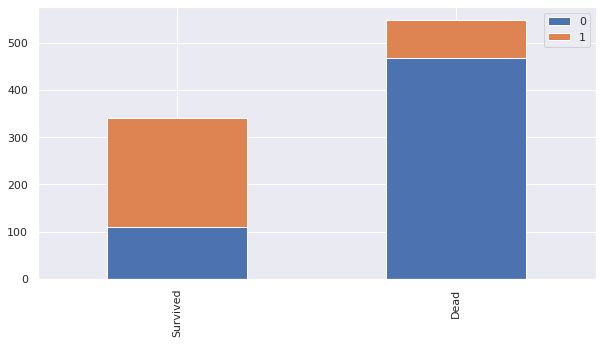

In [ ]:
sex_mapping = {"male": 0, "female": 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)
bar_chart('Sex')

Age

In [ ]:
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)

Age - Binning

In [ ]:
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


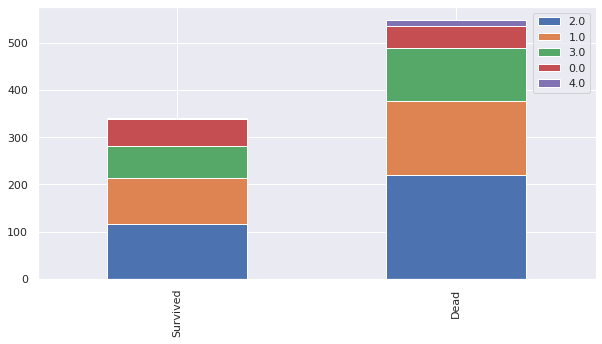

In [ ]:
bar_chart('Age')

Embarked

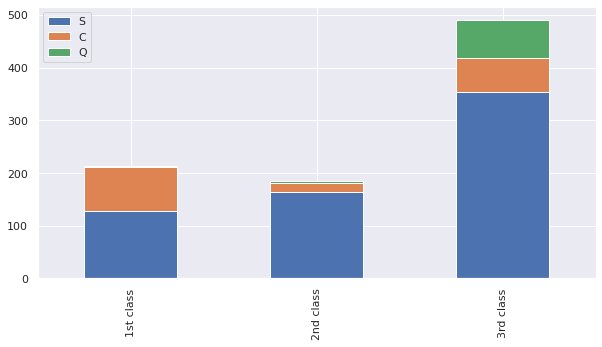

In [ ]:
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


more than 50% of 1st class are from S embark
more than 50% of 2nd class are from S embark
more than 50% of 3rd class are from S embark

In [ ]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

Fare

In [ ]:
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [ ]:
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

Cabin

In [ ]:
dataset['Cabin'] = dataset['Cabin'].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


Family Size

In [ ]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

feature Drop

In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
dataset = dataset.drop(features_drop, axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


## Modelling

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:, 1:].values
y=dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120  19]
 [ 23  61]]


0.8116591928251121

Training the logistic regressin model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[113  26]
 [ 22  62]]


0.7847533632286996

Training the K-NN model  on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[117  22]
 [ 24  60]]


0.7937219730941704

Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[118  21]
 [ 20  64]]


0.8161434977578476

Training the naive bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103  36]
 [ 10  74]]


0.7937219730941704